In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [10]:
# Directories
PROCESSED_DIR = "data/processed"

# Load all processed PDB files
def load_data():
    pdb_data = {}
    for file in os.listdir(PROCESSED_DIR):
        if file.endswith(".npy"):
            pdb_id = file.split(".")[0]
            pdb_data[pdb_id] = np.load(os.path.join(PROCESSED_DIR, file))
    return pdb_data

data = load_data()

In [11]:
# Display basic information
def print_data_info(pdb_data):
    for pdb_id, coords in pdb_data.items():
        print(f"\nPDB ID: {pdb_id}")
        print(f"Number of Cα atoms: {coords.shape[0]}")
        print(f"Shape of data: {coords.shape}")
        print(f"Mean coordinate: {np.mean(coords, axis=0)}")
        print(f"Standard deviation: {np.std(coords, axis=0)}")
print_data_info(data)


PDB ID: 1alm
Number of Cα atoms: 2948
Shape of data: (2948, 3)
Mean coordinate: [31.85563161 -7.02454851 15.12327205]
Standard deviation: [46.9418457  20.62173408 36.38987145]

PDB ID: 1mbn
Number of Cα atoms: 153
Shape of data: (153, 3)
Mean coordinate: [13.71568627 20.47581699  8.2503268 ]
Standard deviation: [9.70817402 7.85194723 8.54110495]

PDB ID: 1crn
Number of Cα atoms: 46
Shape of data: (46, 3)
Mean coordinate: [9.56043478 9.95091304 7.10765217]
Standard deviation: [5.85212986 4.57336211 6.20098862]

PDB ID: 1hhp
Number of Cα atoms: 99
Shape of data: (99, 3)
Mean coordinate: [ 44.27286869  44.2070404  -11.56511111]
Standard deviation: [6.58022526 8.28147977 7.78765767]

PDB ID: 1ubq
Number of Cα atoms: 76
Shape of data: (76, 3)
Mean coordinate: [30.44289474 29.00898684 15.51639474]
Standard deviation: [6.44845263 6.72753879 6.72638931]


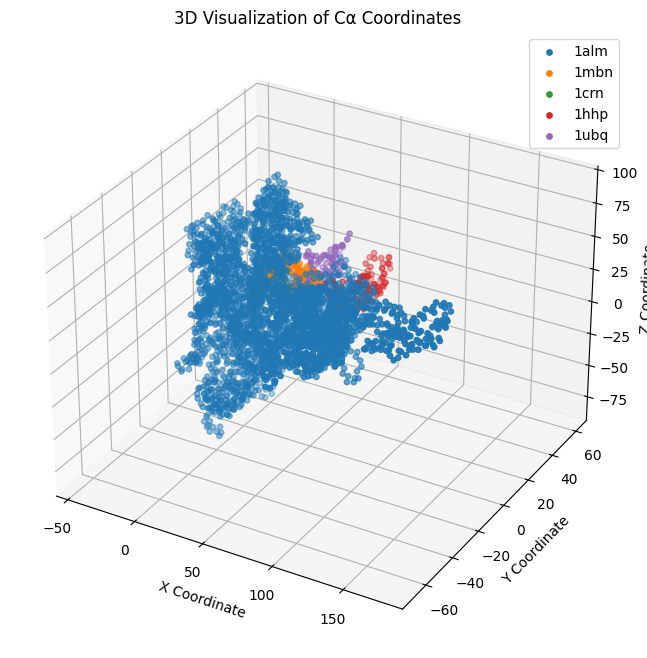

In [12]:
# 3D Visualization of Cα coordinates
def visualize_3d(pdb_data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for pdb_id, coords in pdb_data.items():
        ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], label=pdb_id, s=15)

    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    ax.set_title("3D Visualization of Cα Coordinates")
    ax.legend()
    plt.show()

visualize_3d(data)

In [13]:
# Compute pairwise distances
def compute_pairwise_distances(pdb_data):
    for pdb_id, coords in pdb_data.items():
        distances = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=-1)
        mean_distance = np.mean(distances)
        print(f"\nPDB ID: {pdb_id} - Mean Pairwise Distance: {mean_distance:.2f}")

compute_pairwise_distances(data)



PDB ID: 1alm - Mean Pairwise Distance: 79.03

PDB ID: 1mbn - Mean Pairwise Distance: 19.82

PDB ID: 1crn - Mean Pairwise Distance: 12.51

PDB ID: 1hhp - Mean Pairwise Distance: 17.11

PDB ID: 1ubq - Mean Pairwise Distance: 15.02
